In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q 1.1.1.

In [2]:
# Step 1: Importing the Retail_Data_Transactions dataset.
txn = pd.read_csv("Retail_Data_Transactions.csv")
txn.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [3]:
# Step 2: Identifying the number of rows of the dataset.
print(f"There are {txn.shape[0]} rows in this dataset")

There are 125000 rows in this dataset


#### There are 125000 rows in this dataset.

### Q 1.1.2.

In [4]:
# Creating a new column 'txn_date' from 'trans_date' with pd.to datetime.
txn["txn_date"] = pd.to_datetime(txn["trans_date"])
txn.head()

,customer_id,trans_date,tran_amount,txn_date
0,CS5295,11-Feb-13,35,2013-02-11
1,CS4768,15-Mar-15,39,2015-03-15
2,CS2122,26-Feb-13,52,2013-02-26
3,CS1217,16-Nov-11,99,2011-11-16
4,CS1850,20-Nov-13,78,2013-11-20


In [5]:
# Dropping the 'trans_date' column.
txn.drop(columns=["trans_date"], inplace=True)
txn.head()

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20


### Q 1.1.3.

In [6]:
# Identifying the min() and max() of column 'txn date'.
txn_min = txn['txn_date'].min()
txn_max = txn['txn_date'].max()
print(f"min txn_date: {txn_min}\nmax txn_date: {txn_max}")

min txn_date: 2011-05-16 00:00:00
max txn_date: 2015-03-16 00:00:00


#### Answer:
#### The min()  of column 'txn date' is 2011-05-16 00:00:00 and the max() is 2015-03-16 00:00:00

### Q 1.1.4.

In [7]:
# Creating the column 'ME_DT' from the last day of the month in the 'txn_date' column.
txn["ME_DT"] = txn["txn_date"] + pd.offsets.MonthEnd(0)
txn.head()

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30


### Q 1.1.5.

In [8]:
# Creating the column 'YEAR' from the year in the 'trans date' column.
txn["YEAR"] = pd.DatetimeIndex(txn["txn_date"]).year
txn.iloc[55:60]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


### Q 1.2.1.

In [9]:
# Using groupby and NamedAgg to create the clnt_annual_aggregations DataFrame.
clnt_annual_aggregations = txn.groupby(["customer_id", "YEAR"]).agg(
    ann_txn_amt_sum=pd.NamedAgg(column="tran_amount", aggfunc="sum"),
    ann_txn_amt_ave=pd.NamedAgg(column="tran_amount", aggfunc="mean"),
    ann_txn_amt_std=pd.NamedAgg(column="tran_amount", aggfunc="std"),
    ann_txn_amt_var=pd.NamedAgg(column="tran_amount", aggfunc="var"),
    ann_txn_amt_sem=pd.NamedAgg(column="tran_amount", aggfunc="sem"),
    ann_txn_amt_max=pd.NamedAgg(column="tran_amount", aggfunc="max"),
    ann_txn_amt_min=pd.NamedAgg(column="tran_amount", aggfunc="min"),
    ann_txn_amt_cnt=pd.NamedAgg(column="tran_amount", aggfunc="count"))

clnt_annual_aggregations.head()

ann_txn_amt_sum  ann_txn_amt_ave  ann_txn_amt_std  \
customer_id YEAR                                                      
CS1112      2011              212        70.666667        22.030282   
            2012              337        67.400000        12.720063   
            2013              212        70.666667        34.501208   
            2014              212        70.666667        16.862186   
            2015               39        39.000000              NaN   

                  ann_txn_amt_var  ann_txn_amt_sem  ann_txn_amt_max  \
customer_id YEAR                                                      
CS1112      2011       485.333333        12.719189               96   
            2012       161.800000         5.688585               81   
            2013      1190.333333        19.919282              105   
            2014       284.333333         9.735388               90   
            2015              NaN              NaN               39   

                  ann_txn_amt_min  ann_txn_amt_cnt  
customer_id YEAR                                    
CS1112      2011               56                3  
            2012               52                5  
            2013               36                3  
            2014               59                3  
            2015               39                1

### Q 1.2.2.

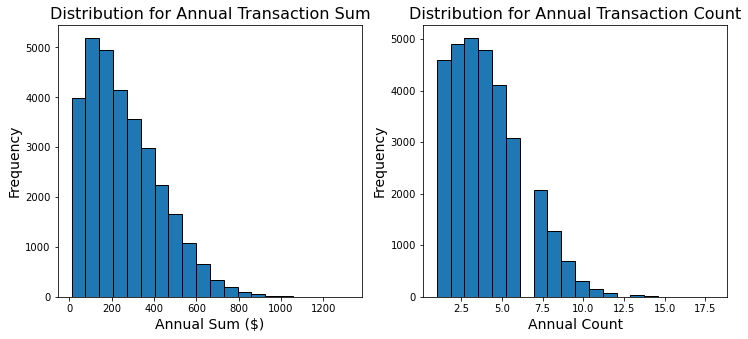

In [10]:
# Plotting the histogram of the sum and count in clnt_annual_aggregations.
fig = plt.figure(figsize=(12, 5))

# Visualizing the distribution for the Annual Transaction Total.
sub1 = fig.add_subplot(121)
# Using 20 bins to capture the spread of the values more.
plt.hist(clnt_annual_aggregations["ann_txn_amt_sum"], bins=20, edgecolor='black')
sub1.set_title("Distribution for Annual Transaction Sum", fontsize=16)
plt.xlabel("Annual Sum ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize= 10)
plt.yticks(rotation=0, fontsize= 10)

# Visualizing the distribution for the Annual Transaction Count.
sub2 = fig.add_subplot(122)
# Using 20 bins to observe the general trends of the values.
plt.hist(clnt_annual_aggregations["ann_txn_amt_cnt"], bins=20, edgecolor='black')
sub2.set_title("Distribution for Annual Transaction Count", fontsize=16)
plt.xlabel("Annual Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize= 10)
plt.yticks(rotation=0, fontsize= 10)

plt.show()

### Q 1.2.3.

In [11]:
# Pivoting the table with the pivot table function to create the clnt_annual_aggregations_pivot DataFrame.
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(clnt_annual_aggregations, 
                                                                      columns=["YEAR"],
                                                                      index=["customer_id"])
clnt_annual_aggregations_pivot.head()                             

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000        NaN   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  NaN  ...           235.0  230.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    NaN      449.583333  908.333333          NaN   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333         NaN  
CS1113       781.666667  745.333333  
CS1114       726.166667         NaN  
CS1115       512.250000         NaN  
CS1116       636.800000         NaN  

[5 rows x 40 columns]

#### Answer:
#### There are 40 columns in this pivoted table because the year is set as the columns and there are 5 years, the 8 annual aggregations have values for all 5 years. Therefore, _5 years * 8 aggregations = 40 columns_.

In [12]:
# Observing the rows in the pivoted table that have NaN values.
clnt_annual_aggregations_pivot[clnt_annual_aggregations_pivot.isna().any(axis=1)]

ann_txn_amt_ave                                         \
YEAR                   2011       2012       2013       2014  2015   
customer_id                                                          
CS1112            70.666667  67.400000  70.666667  70.666667  39.0   
CS1114            85.200000  75.000000  70.400000  70.833333  79.0   
CS1115            87.000000  67.571429  79.571429  78.250000  55.0   
CS1116            58.750000  76.666667  59.000000  66.600000   NaN   
CS1117            71.000000  65.333333  69.400000  71.500000   NaN   
...                     ...        ...        ...        ...   ...   
CS8996            31.000000  33.666667  41.500000  56.000000   NaN   
CS8997            45.000000  39.500000  35.166667  42.000000   NaN   
CS8998            64.000000  54.400000  47.000000  32.500000   NaN   
CS8999            52.000000  25.250000  28.000000  21.000000   NaN   
CS9000            19.500000  54.000000  73.500000  24.250000  34.0   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  NaN  ...           235.0  230.0   
CS1117                  3.0  3.0  5.0  6.0  NaN  ...           213.0  196.0   
...                     ...  ...  ...  ...  ...  ...             ...    ...   
CS8996                  2.0  3.0  2.0  6.0  NaN  ...            62.0  101.0   
CS8997                  2.0  4.0  6.0  2.0  NaN  ...            90.0  158.0   
CS8998                  2.0  5.0  2.0  4.0  NaN  ...           128.0  272.0   
CS8999                  3.0  4.0  3.0  2.0  NaN  ...           156.0  101.0   
CS9000                  2.0  4.0  2.0  4.0  1.0  ...            39.0  216.0   

                                ann_txn_amt_var                            \
YEAR          2013   2014  2015            2011         2012         2013   
customer_id                                                                 
CS1112       212.0  212.0  39.0      485.333333   161.800000  1190.333333   
CS1114       352.0  425.0  79.0       94.700000   968.000000   619.300000   
CS1115       557.0  313.0  55.0      225.000000   477.285714   110.952381   
CS1116        59.0  333.0   NaN      449.583333   908.333333          NaN   
CS1117       347.0  429.0   NaN      679.000000  1070.333333   302.300000   
...            ...    ...   ...             ...          ...          ...   
CS8996        83.0  336.0   NaN       98.000000    20.333333   144.500000   
CS8997       211.0   84.0   NaN        8.000000    45.666667   441.366667   
CS8998        94.0  130.0   NaN       50.000000   505.300000  1568.000000   
CS8999        84.0   42.0   NaN      333.000000    21.583333   103.000000   
CS9000       147.0   97.0  34.0       24.500000   281.333333    12.500000   

                              
YEAR               2014 2015  
customer_id                   
CS1112       284.333333  NaN  
CS1114       726.166667  NaN  
CS1115       512.250000  NaN  
CS1116       636.800000  NaN  
CS1117       251.900000  NaN  
...                 ...  ...  
CS8996       481.600000  NaN  
CS8997        18.000000  NaN  
CS8998       219.666667  NaN  
CS8999        18.000000  NaN  
CS9000        68.250000  NaN  

[5682 rows x 40 columns]

In [13]:
# Checking the raw data for missing values.
txn.isna().values.any()

False

In [14]:
# Imputing the NaN entries (0) after performing the pivot table function.
clnt_annual_aggregations_pivot.fillna(0, inplace=True)
clnt_annual_aggregations_pivot.head()

ann_txn_amt_ave                                              \
YEAR                   2011       2012       2013       2014       2015   
customer_id                                                               
CS1112            70.666667  67.400000  70.666667  70.666667  39.000000   
CS1113            81.333333  74.800000  85.200000  56.500000  73.333333   
CS1114            85.200000  75.000000  70.400000  70.833333  79.000000   
CS1115            87.000000  67.571429  79.571429  78.250000  55.000000   
CS1116            58.750000  76.666667  59.000000  66.600000   0.000000   

            ann_txn_amt_cnt                      ... ann_txn_amt_sum         \
YEAR                   2011 2012 2013 2014 2015  ...            2011   2012   
customer_id                                      ...                          
CS1112                  3.0  5.0  3.0  3.0  1.0  ...           212.0  337.0   
CS1113                  3.0  5.0  5.0  4.0  3.0  ...           244.0  374.0   
CS1114                  5.0  2.0  5.0  6.0  1.0  ...           426.0  150.0   
CS1115                  3.0  7.0  7.0  4.0  1.0  ...           261.0  473.0   
CS1116                  4.0  3.0  1.0  5.0  0.0  ...           235.0  230.0   

                                 ann_txn_amt_var                           \
YEAR          2013   2014   2015            2011        2012         2013   
customer_id                                                                 
CS1112       212.0  212.0   39.0      485.333333  161.800000  1190.333333   
CS1113       426.0  226.0  220.0      444.333333  290.200000   171.200000   
CS1114       352.0  425.0   79.0       94.700000  968.000000   619.300000   
CS1115       557.0  313.0   55.0      225.000000  477.285714   110.952381   
CS1116        59.0  333.0    0.0      449.583333  908.333333     0.000000   

                                     
YEAR               2014        2015  
customer_id                          
CS1112       284.333333    0.000000  
CS1113       781.666667  745.333333  
CS1114       726.166667    0.000000  
CS1115       512.250000    0.000000  
CS1116       636.800000    0.000000  

[5 rows x 40 columns]

#### Answer:
#### Since the lack of data is due to either not being able to compute certain metrics or just not having any transaction data during those periods, 0 was imputed for the NaN enteries. Furthermore, there are no missing values in the original raw data, indicating that there is not enough information needed to calculate the values that are absent from the pivoted table.

### Q 1.2.4.

In [15]:
# Observing the number of levels of the multiple levels of columns.
clnt_annual_aggregations_pivot.columns.nlevels

2

In [16]:
# Observing the column names for multiple levels of columns .
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

#### Answer:
####  The column names are paired with each metric and each year because there are two levels of columns: the first level contains those metrics, and the second level has the years.

### Q 1.2.5.

In [17]:
# Converting the multi-level columns to a sinle level column. 
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot.head()

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3.0,5.0,3.0,3.0,1.0,...,212.0,337.0,212.0,212.0,39.0,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3.0,5.0,5.0,4.0,3.0,...,244.0,374.0,426.0,226.0,220.0,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5.0,2.0,5.0,6.0,1.0,...,426.0,150.0,352.0,425.0,79.0,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3.0,7.0,7.0,4.0,1.0,...,261.0,473.0,557.0,313.0,55.0,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4.0,3.0,1.0,5.0,0.0,...,235.0,230.0,59.0,333.0,0.0,449.583333,908.333333,0.000000,636.800000,0.000000


#### Answer:
#### The first line of code extracts the first level of the column MultiIndex as strings and the second line of code does the same for the second level of the column. The third line of code re-assigns the column names as the concatenation of the first and second level column names joined by an underscore.

In [18]:
# Saving the dataframe clnt_annual_aggregations_pivot as an .xlsx file.
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

### Q 1.2.6.

#### Answer:
#### The annual transaction information for behavior analysis from the bank side may be imprecise and devoid of seasonal patterns since the time frame is too broad. The lack of timeliness in the previous year's transaction statistics makes them unhelpful from the client's perspective if they wish to understand their transaction behavior.

### Q 1.3.1.

In [19]:
# Using groupby and NamedAgg to create the clnt_monthly_aggregations DataFrame.
clnt_monthly_aggregations = txn.groupby(["customer_id", "ME_DT"]).agg(
    mth_txn_amt_sum=pd.NamedAgg(column="tran_amount", aggfunc="sum"),
    mth_txn_cnt=pd.NamedAgg(column="tran_amount", aggfunc="count"))

clnt_monthly_aggregations.head(15)

mth_txn_amt_sum  mth_txn_cnt
customer_id ME_DT                                   
CS1112      2011-06-30               56            1
            2011-08-31               96            1
            2011-10-31               60            1
            2012-04-30               56            1
            2012-06-30               52            1
            2012-07-31               81            1
            2012-09-30               72            1
            2012-12-31               76            1
            2013-03-31              105            1
            2013-07-31               36            1
            2013-11-30               71            1
            2014-04-30               63            1
            2014-07-31               90            1
            2014-12-31               59            1
            2015-01-31               39            1

### Q 1.3.2.

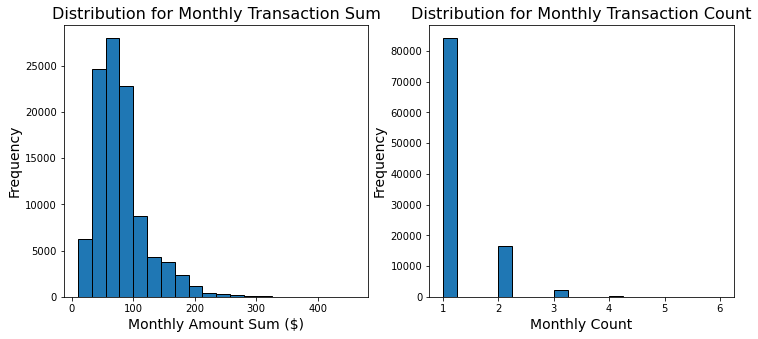

In [20]:
# Plotting the histogram of the sum and count in clnt_monthly_aggregations.
fig = plt.figure(figsize=(12, 5))

# Visualizing the distribution for the Monthly Transaction Amount Total.
sub1 = fig.add_subplot(121)
# Using 20 bins to capture the spread of the values more.
plt.hist(clnt_monthly_aggregations["mth_txn_amt_sum"], bins=20, edgecolor='black')
sub1.set_title("Distribution for Monthly Transaction Sum", fontsize=16)
plt.xlabel("Monthly Amount Sum ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize= 10)
plt.yticks(rotation=0, fontsize= 10)

# Visualizing the distribution for the monthly Transaction Count.
sub2 = fig.add_subplot(122)
# Using 20 bins to observe the general trends of the values.
plt.hist(clnt_monthly_aggregations["mth_txn_cnt"], bins=20, edgecolor='black')
sub2.set_title("Distribution for Monthly Transaction Count", fontsize=16)
plt.xlabel("Monthly Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize= 10)
plt.yticks(rotation=0, fontsize= 10)

plt.show()

#### Answer:
#### The monthly transaction pattern is comparable to the annual transaction pattern, with the majority of transactions falling below 100 dollars and just a small number exceeding 200 dollars. The most common value for the monthly transaction sum is 70 dollars and  more than 70% of clients only make one transaction each month, which is the most common monthly transaction frequency. Combining the two graphs will thus reveal that the data is highly irregular or out of balance. One, or one transaction each month, is unquestionably the most prevalent value for the count.

### Q 1.4.1.

In [21]:
# Creating the numpy arrays of the unique elements in 'customer_id' and 'ME_DT' of the txn table.
clnt_no = np.array(txn["customer_id"].unique())
me_dt = np.array(txn["ME_DT"].unique())
print(f"Unique clients: {clnt_no.shape[0]}\nUnique month-end dates: {me_dt.shape[0]}")

Unique clients: 6889
Unique month-end dates: 47


### Q 1.4.2.

In [22]:
# Using the itertools.product to generate all the possible combinations of 'customer_id' and 'ME_DT'.
from itertools import product
base_table = product ( clnt_no , me_dt )
base_table

### Q 1.4.3.

In [23]:
# Converting the itertools.product object base_table into a pandas object.
base_table_pd = pd.DataFrame.from_records(base_table, columns=["CLNT_NO", "ME_DT"])
base_table_pd.head()

,CLNT_NO,ME_DT
0,CS5295,2013-02-28
1,CS5295,2015-03-31
2,CS5295,2011-11-30
3,CS5295,2013-11-30
4,CS5295,2014-03-31


### Q 1.4.4.

In [24]:
# Validating that the created table is what was originally wanted.
# Step 1: Filtering client CS1112 to confirm that the dates fall between the min and max month-dates.
cs1112_txn_min = base_table_pd[base_table_pd["CLNT_NO"]=="CS1112"]['ME_DT'].min()
cs1112_txn_max = base_table_pd[base_table_pd["CLNT_NO"]=="CS1112"]['ME_DT'].max()

print(f"CS1112 min date, {cs1112_txn_min}, is later than the txn min date, {txn_min}")
print(f"CS1112 max date, {cs1112_txn_max}, is the last day of the txn max date, {txn_max}")

CS1112 min date, 2011-05-31 00:00:00, is later than the txn min date, 2011-05-16 00:00:00
CS1112 max date, 2015-03-31 00:00:00, is the last day of the txn max date, 2015-03-16 00:00:00


In [25]:
# Viewing the month values in the snapshot of client CS1112.
base_table_pd[base_table_pd['CLNT_NO']=='CS1112'].sort_values(by='ME_DT')

,CLNT_NO,ME_DT
157064,CS1112,2011-05-31
157058,CS1112,2011-06-30
157044,CS1112,2011-07-31
157069,CS1112,2011-08-31
157060,CS1112,2011-09-30
157048,CS1112,2011-10-31
157029,CS1112,2011-11-30
157049,CS1112,2011-12-31
157046,CS1112,2012-01-31
157032,CS1112,2012-02-29


In [26]:
# Confirming the number of rows in the snapshot of client CS1112.
cs1112_row_count = base_table_pd[base_table_pd['CLNT_NO']=='CS1112'].shape[0]
print(f"The Snapshot of client CS1112 has {cs1112_row_count} rows for each month in the dataset.")

The Snapshot of client CS1112 has 47 rows for each month in the dataset.


In [27]:
# Step 2: Confirming the number of rows of the base table.
print(f"The Base table has {base_table_pd.shape[0]} rows.")

The Base table has 323783 rows.


### Q 1.5.1.

In [28]:
# Renaming the 'customer_id' column to 'CLNT_NO' for the merge.
clnt_monthly_aggregations.index.rename({"customer_id": "CLNT_NO"}, inplace=True)
# Left-joining base_table_pd with clnt_monthly_aggregations on [CLNT_NO, ME_DT].
base_clnt_mth = base_table_pd.merge(clnt_monthly_aggregations, how="left", on=["CLNT_NO", "ME_DT"])
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,NaN,NaN
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN


In [29]:
# Imputing the NaN values (0).
base_clnt_mth.fillna(0, inplace=True)
base_clnt_mth.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
0,CS5295,2013-02-28,35.0,1.0
1,CS5295,2015-03-31,0.0,0.0
2,CS5295,2011-11-30,132.0,2.0
3,CS5295,2013-11-30,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0


In [30]:
# Confirming the number rows in base_clnt_mth.
print(f"base_clnt_mth has {base_clnt_mth.shape[0]} rows.")

base_clnt_mth has 323783 rows.


#### Answer:
- Some rows have NaN values because clients have no transaction during those months. It is important to remember that the base_table_pd contains every possible combination of clients and dates while clnt_monthly_aggregations contains the actual data supplied. The NaN rows are effectively the difference.
- The NaN just indicates 0 amount sum and 0 count because there is no transaction made on those dates with missing values, thus  0 is imputed.
- There are exactly 323783 rows, which is the number of base_table_pd rows as expected.
- Unlike clnt_monthly_aggregation, which is a data collection with months containing transactions (non-zero), base_clnt_mth is a more comprehensive collection of client data by capturing all the months.

### Q 1.5.2.

In [31]:
# Sorting the data first by 'CLNT_NO' and then by 'ME_DT' in ascending order.
base_clnt_mth.sort_values(by=["CLNT_NO", "ME_DT"], inplace=True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt
157064,CS1112,2011-05-31,0.0,0.0
157058,CS1112,2011-06-30,56.0,1.0
157044,CS1112,2011-07-31,0.0,0.0
157069,CS1112,2011-08-31,96.0,1.0
157060,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
295140,CS9000,2014-11-30,0.0,0.0
295126,CS9000,2014-12-31,0.0,0.0
295119,CS9000,2015-01-31,0.0,0.0
295136,CS9000,2015-02-28,34.0,1.0


### Q 1.5.3.

In [32]:
# Calculating the 3-month rolling window features.
rolling_features_3M = base_clnt_mth.groupby(["CLNT_NO"])\
    [["mth_txn_amt_sum", "mth_txn_cnt"]].rolling(3).agg(["sum","mean","max"])
rolling_features_3M.head()

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044            56.0  18.666667  56.0         1.0  0.333333  1.0
        157069           152.0  50.666667  96.0         2.0  0.666667  1.0
        157060            96.0  32.000000  96.0         1.0  0.333333  1.0

In [33]:
# Calculating the 6-month rolling window features.
rolling_features_6M = base_clnt_mth.groupby(["CLNT_NO"])\
    [["mth_txn_amt_sum", "mth_txn_cnt"]].rolling(6).agg(["sum","mean","max"])
rolling_features_6M.head(10)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048           212.0  35.333333  96.0         3.0  0.500000  1.0
        157029           212.0  35.333333  96.0         3.0  0.500000  1.0
        157049           156.0  26.000000  96.0         2.0  0.333333  1.0
        157046           156.0  26.000000  96.0         2.0  0.333333  1.0
        157032            60.0  10.000000  60.0         1.0  0.166667  1.0

In [34]:
# Calculating the 12-month rolling window features.
rolling_features_12M = base_clnt_mth.groupby(["CLNT_NO"])\
    [["mth_txn_amt_sum", "mth_txn_cnt"]].rolling(12).agg(["sum","mean","max"])
rolling_features_12M.head(15)

mth_txn_amt_sum                  mth_txn_cnt               
                           sum       mean   max         sum      mean  max
CLNT_NO                                                                   
CS1112  157064             NaN        NaN   NaN         NaN       NaN  NaN
        157058             NaN        NaN   NaN         NaN       NaN  NaN
        157044             NaN        NaN   NaN         NaN       NaN  NaN
        157069             NaN        NaN   NaN         NaN       NaN  NaN
        157060             NaN        NaN   NaN         NaN       NaN  NaN
        157048             NaN        NaN   NaN         NaN       NaN  NaN
        157029             NaN        NaN   NaN         NaN       NaN  NaN
        157049             NaN        NaN   NaN         NaN       NaN  NaN
        157046             NaN        NaN   NaN         NaN       NaN  NaN
        157032             NaN        NaN   NaN         NaN       NaN  NaN
        157045             NaN        NaN   NaN         NaN       NaN  NaN
        157062           268.0  22.333333  96.0         4.0  0.333333  1.0
        157061           268.0  22.333333  96.0         4.0  0.333333  1.0
        157073           264.0  22.000000  96.0         4.0  0.333333  1.0
        157065           345.0  28.750000  96.0         5.0  0.416667  1.0

In [35]:
# Observing the number of levels in the index and columns.
rol_idx_lvl = rolling_features_3M.index.nlevels
rol_col_lvl = rolling_features_3M.columns.nlevels
print(f"Index levels: {rol_idx_lvl}\nColumn levels: {rol_col_lvl}")

Index levels: 2
Column levels: 2


#### Answer:
- There are 2, 5 and 11 (following an n-1 series) rows that appear with NaN values at the beginning of the 3, 6, and 12-month windows, respectively. These numbers can also be observed in the snapshots of the tables shown above. These NaN values appear because, depending on its size, the window will not fit in at the beginning because the calculation is to obtain statistics from the previous n months. 
- The index has 2 levels and the column has 2 levels therefore these dataframes are multi-indexed. It retains the original row index and combines with the 'CLNT_NO' for index direction, and it retains the original column names and combines with the metrics ["sum","mean","max"] for column direction.

In [36]:
# Renaming the columns of the 3 rolling features tables.
rolling_features_3M.columns = ["amt_sum_3M", "amt_mean_3M", "amt_max_3M", "txn_cnt_sum_3M", "txn_cnt_mean_3M", "txn_cnt_max_3M"]
rolling_features_6M.columns = ["amt_sum_6M", "amt_mean_6M", "amt_max_6M", "txn_cnt_sum_6M", 'txn_cnt_mean_6M', "txn_cnt_max_6M"]
rolling_features_12M.columns = ["amt_sum_12M", "amt_mean_12M", "amt_max_12M", "txn_cnt_sum_12M", "txn_cnt_mean_12M", "txn_cnt_max_12M"]

In [37]:
rolling_features_3M.head(0)

,,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M
CLNT_NO,,,,,,,


In [38]:
rolling_features_6M.head(0)

,,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M
CLNT_NO,,,,,,,


In [39]:
rolling_features_12M.head(0)

,,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
CLNT_NO,,,,,,,


### Q 1.5.4.

In [40]:
# Dropping the level:0 of the rolling features MultiIndex.
rolling_features_3M.index = rolling_features_3M.index.droplevel(0)
rolling_features_6M.index = rolling_features_6M.index.droplevel(0)
rolling_features_12M.index = rolling_features_12M.index.droplevel(0)

In [41]:
# Joining the rolling features with base_clnt_mth on the indexes.
all_rolling_features = pd.concat([base_clnt_mth, 
                                  rolling_features_3M, 
                                  rolling_features_6M, 
                                  rolling_features_12M], axis=1)
all_rolling_features.head()

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
157064,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157058,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157044,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157069,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157060,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q 1.5.5.

In [42]:
# Confirming the number of rows and columns in all_rolling_features.
arf_row_count, arf_col_count = all_rolling_features.shape
print(f"all_rolling_features has {arf_row_count} rows and {arf_col_count} columns.")

all_rolling_features has 323783 rows and 22 columns.


In [43]:
# Saving the dataframe all_rolling_features as an .xlsx file.
all_rolling_features.to_excel("mth_rolling_features.xlsx")

### Q 1.6.1.

In [44]:
# Using the attributes dt.dayofweek and  dt.day_name() to extract the day name and day of the week.
txn["day_of_the_week"] = txn["txn_date"].dt.dayofweek
txn["day_name"] = txn["txn_date"].dt.day_name()
txn.head(4)

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday


### Q 1.6.2.

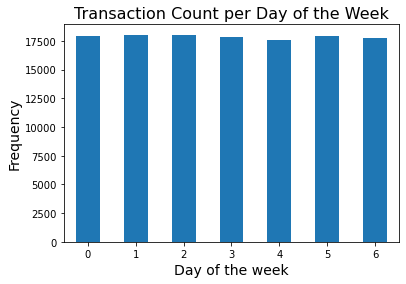

In [45]:
# Visualizing the bar plot that shows the count of transactions per day of the week.
txn_count_per_day = txn["day_of_the_week"].value_counts().sort_index()

txn_count_per_day.plot(kind="bar")
plt.title("Transaction Count per Day of the Week", fontsize= 16)
plt.xlabel("Day of the week", fontsize= 14)
plt.ylabel("Frequency", fontsize= 14)
plt.xticks(rotation=0, fontsize= 10)
plt.yticks(rotation=0, fontsize= 10)
plt.show()

### Q 1.6.3.

In [46]:
# Generating the features that capture the count of transactions per client, year and day of the week.
clnt_daily_aggregations = txn.groupby(["customer_id", "YEAR", "day_name"])["tran_amount"].agg(cnt="count")
clnt_daily_aggregations = pd.DataFrame(clnt_daily_aggregations)
clnt_daily_aggregations.head()

cnt
customer_id YEAR day_name      
CS1112      2011 Friday       1
                 Sunday       1
                 Wednesday    1
            2012 Saturday     1
                 Sunday       3

In [47]:
# Generating the intermediate MultiIndex dataframe (with nlevels=3).
# Imputing 0 to NaN columns and converting all values to integers.
clnt_daily_aggregations_pivot = pd.pivot_table(clnt_daily_aggregations, 
                                                index = "customer_id", 
                                                columns = ("YEAR", "day_name")).fillna(0).astype(int)
clnt_daily_aggregations_pivot

cnt                                                           \
YEAR          2011                                                     2012   
day_name    Friday Monday Saturday Sunday Thursday Tuesday Wednesday Friday   
customer_id                                                                   
CS1112           1      0        0      1        0       0         1      0   
CS1113           1      1        0      1        0       0         0      2   
CS1114           0      1        0      1        1       0         2      0   
CS1115           0      0        1      1        0       0         1      1   
CS1116           1      1        0      0        1       1         0      1   
...            ...    ...      ...    ...      ...     ...       ...    ...   
CS8996           0      1        0      0        0       1         0      0   
CS8997           0      0        0      0        1       0         1      1   
CS8998           0      0        0      0        0       1         1      2   
CS8999           0      1        1      0        0       1         0      1   
CS9000           0      0        0      2        0       0         0      1   

                             ...                                           \
YEAR                         ...     2014                     2015          
day_name    Monday Saturday  ... Thursday Tuesday Wednesday Friday Monday   
customer_id                  ...                                            
CS1112           0        1  ...        1       1         1      0      0   
CS1113           1        0  ...        0       3         0      0      2   
CS1114           0        1  ...        0       1         1      0      0   
CS1115           1        0  ...        2       0         2      0      0   
CS1116           0        0  ...        0       0         0      0      0   
...            ...      ...  ...      ...     ...       ...    ...    ...   
CS8996           0        3  ...        1       1         2      0      0   
CS8997           2        0  ...        0       0         0      0      0   
CS8998           0        0  ...        0       1         1      0      0   
CS8999           0        2  ...        0       0         2      0      0   
CS9000           0        1  ...        1       1         0      0      0   

                                                        
YEAR                                                    
day_name    Saturday Sunday Thursday Tuesday Wednesday  
customer_id                                             
CS1112             0      0        0       0         1  
CS1113             0      0        0       0         1  
CS1114             0      0        1       0         0  
CS1115             0      0        1       0         0  
CS1116             0      0        0       0         0  
...              ...    ...      ...     ...       ...  
CS8996             0      0        0       0         0  
CS8997             0      0        0       0         0  
CS8998             0      0        0       0         0  
CS8999             0      0        0       0         0  
CS9000             1      0        0       0         0  

[6889 rows x 35 columns]

In [48]:
# Creating the final pivoted output with a single index.
clnt_daily_aggregations_pivot.columns = ['_'.join([str(i) for i in col])\
                                               for col in clnt_daily_aggregations_pivot.columns]
clnt_daily_aggregations_pivot

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,...,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,...,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,...,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,...,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,...,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,...,0,1,1,0,0,0,0,0,0,0


### Q 1.6.4.

In [49]:
# Confirming that clnt_weekly_aggregations_pivot has the same number of rows as clnt_annual_aggregations_pivot.
Annual_row_count = clnt_annual_aggregations_pivot.shape[0]
daily_row_count = clnt_daily_aggregations_pivot.shape[0]

Annual_row_count == daily_row_count

True

In [50]:
# Viewing the rows and column counts.
clnt_daily_aggregations_pivot.shape

(6889, 35)

In [51]:
# Saving the dataframe clnt_weekly_aggregations_pivot as an .xlsx file.
clnt_daily_aggregations_pivot.to_excel("annual_day_of_week_counts_pivot.xlsx")

#### Answer:
- The output has 6889 rows, which is the same number as the clnt_annual_aggregations_pivot.
- 35 features/columns were created in this section as a result of having 5 years of range (from the year 2011 to the year 2015) and 7 days of the week, therefore we have 5 * 7, or 35 features.

### Q 1.6.5.

In [52]:
# Generating the features that capture the count of transactions per client, month-end-date and day of the week.
clnt_monthly_day_aggregations = txn.groupby(["customer_id", "ME_DT", "day_name"])["tran_amount"].agg(cnt = "count")
clnt_monthly_day_aggregations.head()

cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1

In [53]:
# Generating the intermediate MultiIndex dataframe (with nlevels=2).
# Imputing 0 to NaN columns and converting all values to integers.
clnt_monthly_day_aggregations_pivot = pd.pivot_table(clnt_monthly_day_aggregations, 
                                                     index = ("customer_id", "ME_DT"), 
                                                     columns = "day_name").fillna(0).astype(int)
clnt_monthly_day_aggregations_pivot.head()

cnt                                          \
day_name               Friday Monday Saturday Sunday Thursday Tuesday   
customer_id ME_DT                                                       
CS1112      2011-06-30      0      0        0      0        0       0   
            2011-08-31      1      0        0      0        0       0   
            2011-10-31      0      0        0      1        0       0   
            2012-04-30      0      0        0      1        0       0   
            2012-06-30      0      0        0      1        0       0   

                                  
day_name               Wednesday  
customer_id ME_DT                 
CS1112      2011-06-30         1  
            2011-08-31         0  
            2011-10-31         0  
            2012-04-30         0  
            2012-06-30         0

In [54]:
# Creating the final pivoted output with a single index.
clnt_monthly_day_aggregations_pivot.columns = ['_'.join([str(i) for i in col])\
                                               for col in clnt_monthly_day_aggregations_pivot.columns]
clnt_monthly_day_aggregations_pivot.head()

cnt_Friday  cnt_Monday  cnt_Saturday  cnt_Sunday  \
customer_id ME_DT                                                          
CS1112      2011-06-30           0           0             0           0   
            2011-08-31           1           0             0           0   
            2011-10-31           0           0             0           1   
            2012-04-30           0           0             0           1   
            2012-06-30           0           0             0           1   

                        cnt_Thursday  cnt_Tuesday  cnt_Wednesday  
customer_id ME_DT                                                 
CS1112      2011-06-30             0            0              1  
            2011-08-31             0            0              0  
            2011-10-31             0            0              0  
            2012-04-30             0            0              0  
            2012-06-30             0            0              0

### Q 1.6.6.

In [55]:
# Renaming the 'customer_id' column to 'CLNT_NO' for the merge.
clnt_monthly_day_aggregations_pivot.index.rename({"customer_id": "CLNT_NO"}, inplace=True)
# Left-joining base_table_pd with base_clnt_mth_day on [CLNT_NO, ME_DT].
base_clnt_mth_day = base_table_pd.merge(clnt_monthly_day_aggregations_pivot, how="left", on=["CLNT_NO", "ME_DT"])
base_clnt_mth_day.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS5295,2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Imputing the NaN values (0).
base_clnt_mth_day.fillna(0, inplace=True)
base_clnt_mth_day.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS5295,2013-02-28,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CS5295,2015-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CS5295,2011-11-30,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CS5295,2013-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS5295,2014-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Sorting the data first by 'CLNT_NO' and then by 'ME_DT' in ascending order.
base_clnt_mth_day.sort_values(by=["CLNT_NO", "ME_DT"], inplace=True)
base_clnt_mth_day.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
157064,CS1112,2011-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157058,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157044,CS1112,2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157069,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
157060,CS1112,2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Converting the count coulumns to integer.
base_clnt_mth_day.loc[:,"cnt_Friday":"cnt_Wednesday"] = base_clnt_mth_day.loc[:, "cnt_Friday":"cnt_Wednesday"].astype(int)
base_clnt_mth_day.head()

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
157064,CS1112,2011-05-31,0,0,0,0,0,0,0
157058,CS1112,2011-06-30,0,0,0,0,0,0,1
157044,CS1112,2011-07-31,0,0,0,0,0,0,0
157069,CS1112,2011-08-31,1,0,0,0,0,0,0
157060,CS1112,2011-09-30,0,0,0,0,0,0,0


In [59]:
# Saving the dataframe base_clnt_mth_wk as an .xlsx file.
base_clnt_mth_day.to_excel("mth_day_counts.xlsx")

### Q 1.7.1.

In [60]:
# Creating the table last_monthly_purchase that captures the last 'txn_date' for every client and month.
last_monthly_purchase = pd.DataFrame(txn.groupby(["customer_id", "ME_DT"])["txn_date"].max())
last_monthly_purchase.head()

txn_date
customer_id ME_DT                
CS1112      2011-06-30 2011-06-15
            2011-08-31 2011-08-19
            2011-10-31 2011-10-02
            2012-04-30 2012-04-08
            2012-06-30 2012-06-24

### Q 1.7.2.

In [61]:
# Renaming the 'customer_id' column to 'CLNT_NO' for the merge.
last_monthly_purchase.index.rename({"customer_id": "CLNT_NO"}, inplace=True)
# Left-joining base_table_pd with last_monthly_purchase_base on [CLNT_NO, ME_DT].
last_monthly_purchase_base = base_table_pd.merge(last_monthly_purchase, how="left", on=["CLNT_NO", "ME_DT"])
# Sorting the data first by 'CLNT_NO' and then by 'ME_DT' in ascending order.
last_monthly_purchase_base.sort_values(by=['CLNT_NO', 'ME_DT'], inplace=True)
last_monthly_purchase_base.head(8)

,CLNT_NO,ME_DT,txn_date
157064,CS1112,2011-05-31,NaT
157058,CS1112,2011-06-30,2011-06-15
157044,CS1112,2011-07-31,NaT
157069,CS1112,2011-08-31,2011-08-19
157060,CS1112,2011-09-30,NaT
157048,CS1112,2011-10-31,2011-10-02
157029,CS1112,2011-11-30,NaT
157049,CS1112,2011-12-31,NaT


#### Answer:
#### Before reading the solution to the NaT (Not a Timestamp ) imputation solution, I figured the best values for imputuation would be the last known date the client made a transaction for every month following until a new transaction is made. 

### Q 1.7.3.

In [62]:
# Using the apply and a lambda function with the forward-fill function fill().
last_monthly_purchase_base = last_monthly_purchase_base.groupby("CLNT_NO").apply(lambda x: x.ffill())
last_monthly_purchase_base.iloc[92:98,:]

,CLNT_NO,ME_DT,txn_date
160011,CS1113,2015-02-28,2015-02-09
159989,CS1113,2015-03-31,2015-02-09
101134,CS1114,2011-05-31,NaT
101128,CS1114,2011-06-30,NaT
101114,CS1114,2011-07-31,2011-07-14
101139,CS1114,2011-08-31,2011-08-24


### Q 1.7.4.

In [63]:
# Subtracting the two date columns to calculate the column 'days_since_last_txn'.
last_monthly_purchase_base["days_since_last_txn"] = last_monthly_purchase_base["ME_DT"]-last_monthly_purchase_base["txn_date"]
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,txn_date,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaT
157058,CS1112,2011-06-30,2011-06-15,15 days
157044,CS1112,2011-07-31,2011-06-15,46 days
157069,CS1112,2011-08-31,2011-08-19,12 days
157060,CS1112,2011-09-30,2011-08-19,42 days


In [64]:
# Converting the output to .dt.days.
last_monthly_purchase_base["days_since_last_txn"] = last_monthly_purchase_base["days_since_last_txn"].dt.days
last_monthly_purchase_base.head()

,CLNT_NO,ME_DT,txn_date,days_since_last_txn
157064,CS1112,2011-05-31,NaT,NaN
157058,CS1112,2011-06-30,2011-06-15,15.0
157044,CS1112,2011-07-31,2011-06-15,46.0
157069,CS1112,2011-08-31,2011-08-19,12.0
157060,CS1112,2011-09-30,2011-08-19,42.0


### Q 1.7.5.

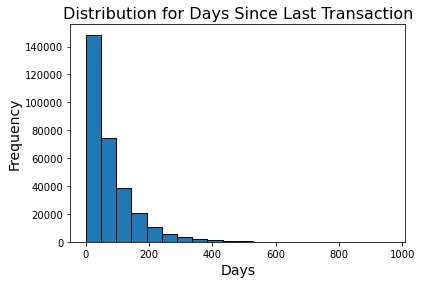

In [65]:
# Visualizing a histogram of the 'days_since_last_txn'.
# Using 20 bins to capture the spread of the values more.
plt.hist(last_monthly_purchase_base["days_since_last_txn"], bins=20, edgecolor="black")
plt.title("Distribution for Days Since Last Transaction", fontsize=16)
plt.xlabel("Days", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize= 10)
plt.yticks(rotation=0, fontsize= 10)
plt.show()

#### Answer:
#### From the histogram, it can be observed that the more recent transactions have the highest frequency. The zeros in the data represent the most recent transactions and thus makes zero a  wrong choice value for imputation. However, a value is still required for imputuation of the NaN and a large-enough negative value, that cannot be obtained realistically, would be used as a placeholder indicating that the data is missing, and no transaction has occurred yet for those months. This would allow for easy observation of  the frequency for the initial months before a client makes a purchase. These values would appear to the left of the most recent transactions, almost like an exclusion from the right side of the distribution. Using a large positive value is also unideal as that value could very much be achieved in reality.

In [66]:
# Imputing the NaN values(-100)
last_monthly_purchase_base["days_since_last_txn"].fillna(-100, inplace=True)

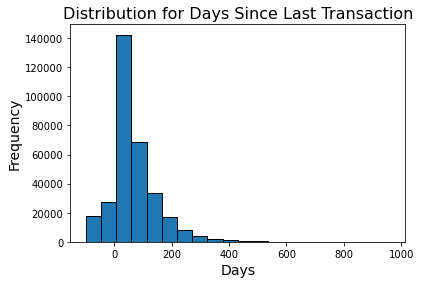

In [67]:
# Visualizing a histogram of the 'days_since_last_txn'.
# Using 20 bins to capture the spread of the values more.
plt.hist(last_monthly_purchase_base["days_since_last_txn"], bins=20, edgecolor="black")
plt.title("Distribution for Days Since Last Transaction", fontsize=16)
plt.xlabel("Days", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize= 10)
plt.yticks(rotation=0, fontsize= 10)
plt.show()

In [68]:
# Reviewing the snapshot of the the transition between clients CS1113 and CS1114 after imputation.
last_monthly_purchase_base.iloc[92:98,:]

,CLNT_NO,ME_DT,txn_date,days_since_last_txn
160011,CS1113,2015-02-28,2015-02-09,19.0
159989,CS1113,2015-03-31,2015-02-09,50.0
101134,CS1114,2011-05-31,NaT,-100.0
101128,CS1114,2011-06-30,NaT,-100.0
101114,CS1114,2011-07-31,2011-07-14,17.0
101139,CS1114,2011-08-31,2011-08-24,7.0


In [69]:
# Saving all but one column in last_monthly_purchase_base as an .xlsx file.
last_monthly_purchase_base[["CLNT_NO", "ME_DT", "days_since_last_txn"]].to_excel("days_since_last_txn.xlsx")